# 08. ARIMA 모델

ARIMA 모델은 시계열을 예측하는 또 하나의 접근 방법입니다. 지수평활(exponential smoothing)과 ARIMA 모델은 시계열을 예측할 때 가장 널리 사용하는 두 가지 접근 방식이고, 주어진 문제를 상호 보완적으로 다루도록 하는 접근 방식입니다. 지수평활 모델은 데이터의 추세와 계절성(seasonality)에 대한 설명에 기초하고, ARIMA 모델은 데이터에 나타나는 자기상관(autocorrelation)을 표현하는데 목적이 있습니다.

ARIMA 모델을 소개하기에 앞서, 정상성(stationarity)과 시계열의 차분(differencing)을 구하는 기법을 먼저 다뤄야 합니다.

<br>

## 08.01. 정상성과 차분

**정상성(stationarity)을 나타내는 시계열은 시계열의 특징이 해당 시계열이 관측된 시간에 무관합니다. 따라서, 추세나 계절성이 있는 시계열은 정상성을 나타내는 시계열이 아닙니다**
- 추세와 계절성은 서로 다른 시간에 시계열의 값에 영향을 줄 것이기 때문입니다. 

**반면에, 백색잡음(white noise) 시계열은 정상성을 나타내는 시계열입니다**
- 언제 관찰하는지에 상관이 없고, 시간에 따라 어떤 시점에서 보더라도 똑같이 보일 것이기 때문입니다.

몇 가지 경우는 헷갈릴 수 있습니다 — **주기성 행동을 가지고 있는 (하지만 추세나 계절성은 없는) 시계열은 정상성을 나타내는 시계열입니다. 왜냐하면 주기가 고정된 길이를 갖고 있지 않기 때문에, 시계열을 관측하기 전에 주기의 고점이나 저점이 어디일지 확실하게 알 수 없습니다.**

일반적으로는, **정상성을 나타내는 시계열은 장기적으로 볼 때 예측할 수 있는 패턴을 나타내지 않을 것입니다. (어떤 주기적인 행동이 있을 수 있더라도) 시간 그래프는 시계열이 일정한 분산을 갖고 대략적으로 평평하게 될 것을 나타낼 것입니다.**

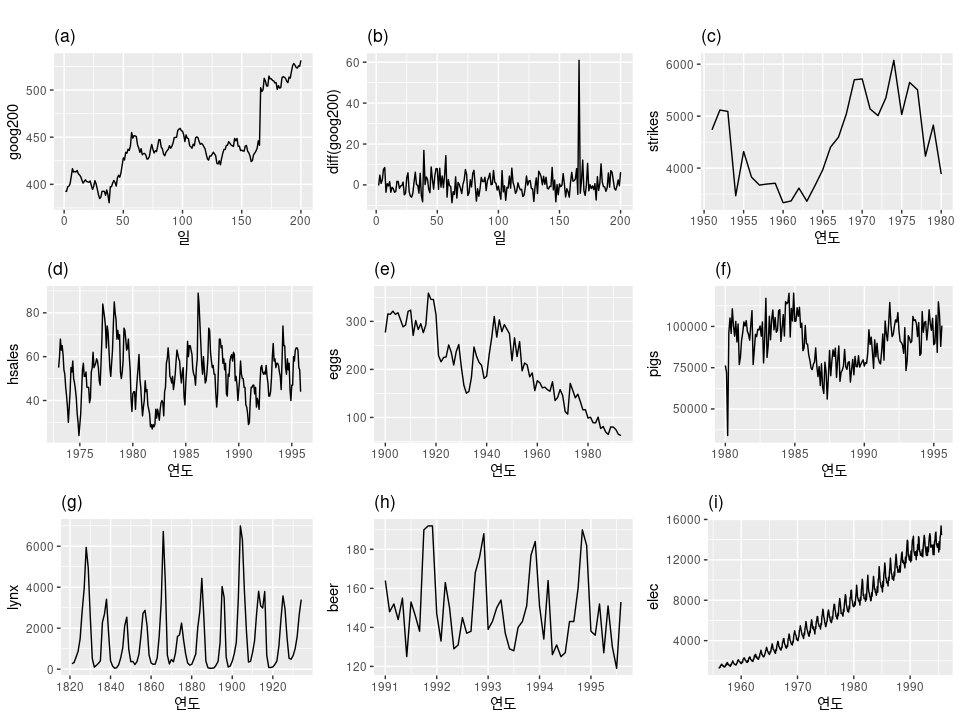

이 중에서 어떤 것이 정상성을 나타내는 시계열이라고 생각합니까?

분명하게 계절성이 보이는 (d), (h), (i)는 후보가 되지 못합니다. 추세가 있고 수준이 변하는 (a), (c), (e), (f), (i)도 후보가 되지 못합니다. 분산이 증가하는 (i)도 후보가 되지 못합니다. **그러면 (b)와 (g)만 정상성을 나타내는 시계열 후보로 남았습니다.**

**언뜻 보면 시계열 (g)에서 나타나는 뚜렷한 주기(cycle) 때문에 정상성을 나타내는 시계열이 아닌 것처럼 보일 수 있습니다. 하지만 이러한 주기는 불규칙적(aperiodic)입니다** — 먹이를 구하기 힘들만큼 살쾡이 개체수가 너무 많이 늘어나 번식을 멈춰서, 개체수가 작은 숫자로 줄어들고, 그 다음 먹이를 구할 수 있게 되어 개체수가 다시 늘어나는 식이기 때문입니다. 장기적으로 볼 때, 이러한 **주기의 시작이나 끝은 예측할 수 없습니다. 따라서 이 시계열은 정상성을 나타내는 시계열입니다.**

<br>

### 차분

패널 (a)의 구글(Google) 주식 가격이 정상성을 나타내는 시계열이 아니었지만 패널 (b)의 일별 변화는 정상성을 나타냈다는 것에 주목합시다. 이 그림은 정상성을 나타내지 않는 시계열을 정상성을 나타내도록 만드는 한 가지 방법을 나타냅니다 — **연이은 관측값들의 차이를 계산하는 것입니다. 이것은 차분(differencing)로 알려져 있습니다.**

**로그 같은 변환은 시계열의 분산 변화를 일정하게 만드는데 도움이 될 수 있습니다. 차분(differencing)은 시계열의 수준에서 나타나는 변화를 제거하여 시계열의 평균 변화를 일정하게 만드는데 도움이 될 수 있습니다. 결과적으로 추세나 계절성이 제거(또는 감소)됩니다.**

정상성을 나타내지 않는 시계열을 찾아낼 때 데이터의 시간 그래프를 살펴보는 것만큼, ACF 그래프도 유용합니다. **정상성을 나타내지 않는 데이터에서는 ACF가 느리게 감소하지만, 정상성을 나타내는 시계열에서는, ACF가 비교적 빠르게 0으로 떨어질 것입니다. 그리고 정상성을 나타내지 않는 데이터에서  $
r
1$
 은 종종 큰 양수 값을 갖습니다.**
 
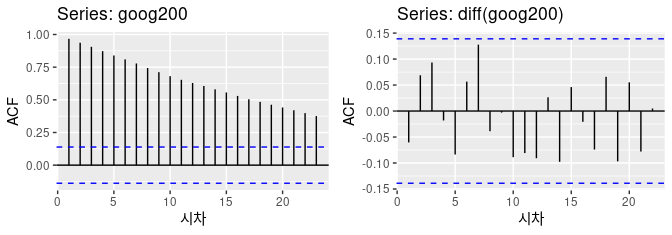

In [2]:
library(tidyverse)
library(fpp3)
library(fpp2)
library(fpp)
library(forecast)

In [3]:
Box.test(diff(goog200), lag=10, type="Ljung-Box")


	Box-Ljung test

data:  diff(goog200)
X-squared = 11.031, df = 10, p-value = 0.3551


차분을 구한 구글 주식 가격의 ACF는 **단순히 백색잡음(white noise) 시계열처럼 생겼습니다. 95% 한계 바깥에 자기상관(autocorrelation) 값이 없고, 융-박스(Ljung-Box) $Q^∗$
  통계는 $
h
=
10$
에 대해 0.355라는 p-값을 갖습니다. 이 결과는 구글 주식 가격의 일별 변동이 기본적으로는 이전 거래일의 데이터와 상관이 없는 무작위적인 양이라는 것을 말해줍니다.**

<br>

### 확률보행 모델

차분(difference)을 구한 시계열은 원래의 시계열에서 연이은 관측값의 차이이고, 다음과 같이 쓸 수 있습니다.


$$y'_t = y_t - y_{t-1}.$$

첫 번째 관측값에 대한 차분  $
y^′_1$
 을 계산할 수 없기 때문에 차분을 구한 시계열은  $T−1$
 개의 값만 가질 것입니다.



차분을 구한 시계열이 백색잡음(white noise)이면, 원래 시계열에 대한 모델은 다음과 같이 쓸 수 있습니다.

$$y_t - y_{t-1} = \varepsilon_t,$$

**여기에서  $ε_t$
  은 백색잡음(white noise)을 의미합니다. 이것을 정리하면 “확률보행(random walk)” 모델을 얻습니다.**

$$y_t = y_{t-1} + \varepsilon_t.$$

**확률보행(random walk) 모델은 정상성을 나타내지 않는 데이터, 특별히 금융이나 경제 데이터를 다룰 때 널리 사용되고 있습니다. 확률보행에는 보통 다음과 같은 특징이 있습니다:**

* 누가 봐도 알 수 있는 긴 주기를 갖는 상향 또는 하향 추세가 있습니다.

* 갑작스럽고 예측할 수 없는 방향 변화가 있습니다.

**미래 이동을 예측할 수 없고 위로 갈 확률이나 아래로 갈 확률이 정확하게 같기 때문에 확률보행 모델에서 낸 예측값은 마지막 관측값과 같습니다. 따라서, 확률보행 모델은 단순(naïve) 예측값을 뒷받침합니다.**

밀접하게 연관된 모델은 차분값이 0이 아닌 평균값을 갖게 합니다. 그러면,

$$y_t - y_{t-1} = c + \varepsilon_t\quad\text{or}\quad {y_t = c + y_{t-1} + \varepsilon_t}\: .$$

**$c$ 값은 연이은 관측값의 차이의 평균입니다.  $c$ 가 양수이면, 평균 변화는  $y_t$
  값에 따라 증가합니다. 따라서,  $y_t$ 는 위쪽 방향으로 이동하는 경향을 나타낼 것입니다. 하지만  $c$ 가 음수이면,  $y_t$ 는 아래쪽 방향으로 이동하는 경향을 나타낼 것입니다.**

이것이 바로 표류 기법(drift model) 속에 숨어있는 모델입니다.

<br>

### 2차 차분

가끔 차분(difference)을 구한 데이터가 정상성(stationarity)이 없다고 보일 수도 있습니다. 정상성을 나타내는 시계열을 얻기 위해 데이터에서 다음과 같이 한 번 더 차분을 구하는 작업이 필요할 수도 있습니다:

$$\begin{align*}
  y''_{t}  &=  y'_{t}  - y'_{t - 1} \\
           &= (y_t - y_{t-1}) - (y_{t-1}-y_{t-2})\\
           &= y_t - 2y_{t-1} +y_{t-2}.
\end{align*}$$

이 경우에는, $y^{''}_t$ 는  $T
−
2$
 개의 값을 가질 것입니다. 그러면, 원본 데이터의 “변화에서 나타나는 변화”를 모델링하게 되는 셈입니다. 실제 상황에서는, 2차 차분 이상으로 구해야 하는 경우는 거의 일어나지 않습니다.
 
<br>
 
### 계절성 차분

**계절성 차분(seasonal differencing)은 관측치와, 같은 계절의 이전 관측값과의 차이를 말합니다. 따라서**

$$y'_t = y_t - y_{t-m},$$

여기에서  $m$ 은 계절의 개수입니다.  $m$  주기 시차 뒤의 관측을 빼기 때문에 시차 $m$  차분이라고 부르기도 합니다.  

**계절성으로 차분을 구한 데이터가 백색잡음(white noise)으로 보이면, 원본 데이터에 대해 적절한 모델은**

$$y_t = y_{t-m}+\varepsilon_t.$$

**이 모델에서 낸 예측값은 관련 있는 계절의 마지막 관측값과 같습니다. 즉, 이 모델은 계절성 단순(seasonal naïve) 예측값을 냅니다.**

아래쪽 패널은 호주에서 팔린 A10 약물(당뇨병 약)의 월별 처방전의 수에 로그를 취하여 계절성 차분을 구한 결과를 나타냅니다. 변환과 차분을 통해 시계열이 정상성을 나타내는 것처럼 보입니다.

* A10 (당뇨병 약) 판매량 데이터에 로그를 취한 것과 계절성 차분을 구한 것. 로그를 취하여 분산이 안정화되는 반면에, 계절성 차분은 계절성과 추세를 제거합니다.

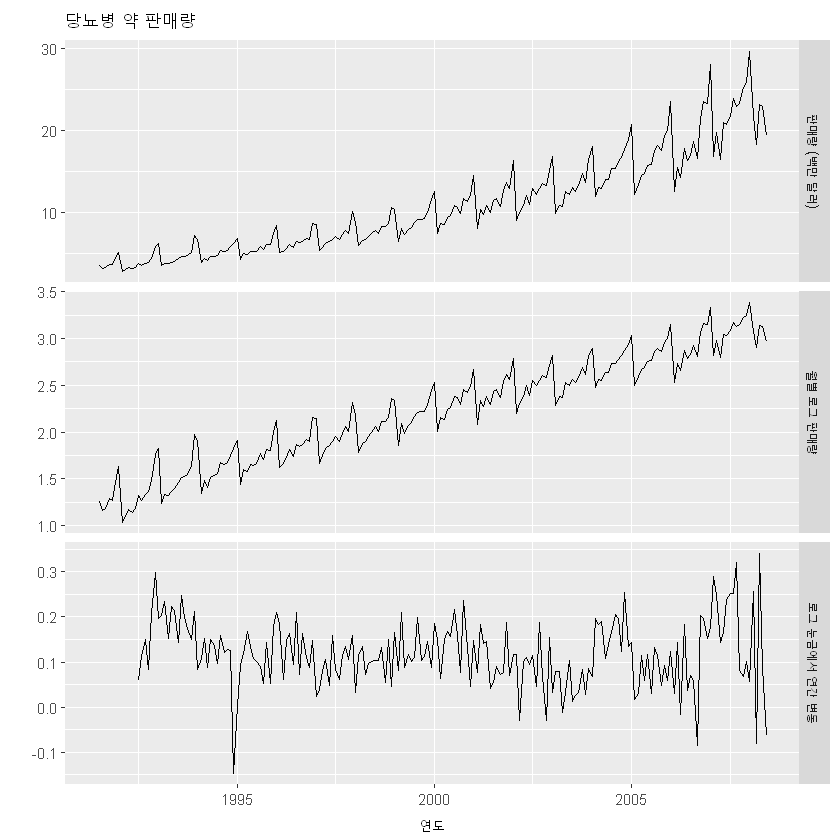

In [4]:
cbind("판매량 (백만 달러)" = a10,
      "월별 로그 판매량" = log(a10),
      "로그 눈금에서 연간 변동" = diff(log(a10),12)) %>%
  autoplot(facets=TRUE) +
    xlab("연도") + ylab("") +
    ggtitle("당뇨병 약 판매량")

보통의 차분와 계절성 차분을 구분하기 위해, 때때로 보통의 차분을 시차 1에서 차분을 구한다는 의미로 “1차 차분(first difference)”라고 부릅니다.

<br>

**계절성을 나타내는 데이터를 얻기 위해 계절성 차분과 1차 차분 둘 다 구하는 것이 필요하기도 합니다. 여기에서는, 데이터를 먼저 로그로 변환하고(두 번째 패널), 그리고 나서 계절성 차분을 계산했습니다(세 번째 패널). 데이터에서 여전히 정상성이 보이지 않는 것 같아서, 1차 차분을 더 많이 계산했습니다(아래 패널).**

*  미국 순 전기 생산량 (10억 kWh). 다른 패널은 같은 데이터를 변환시키고 차분을 구한 것을 나타냅니다.

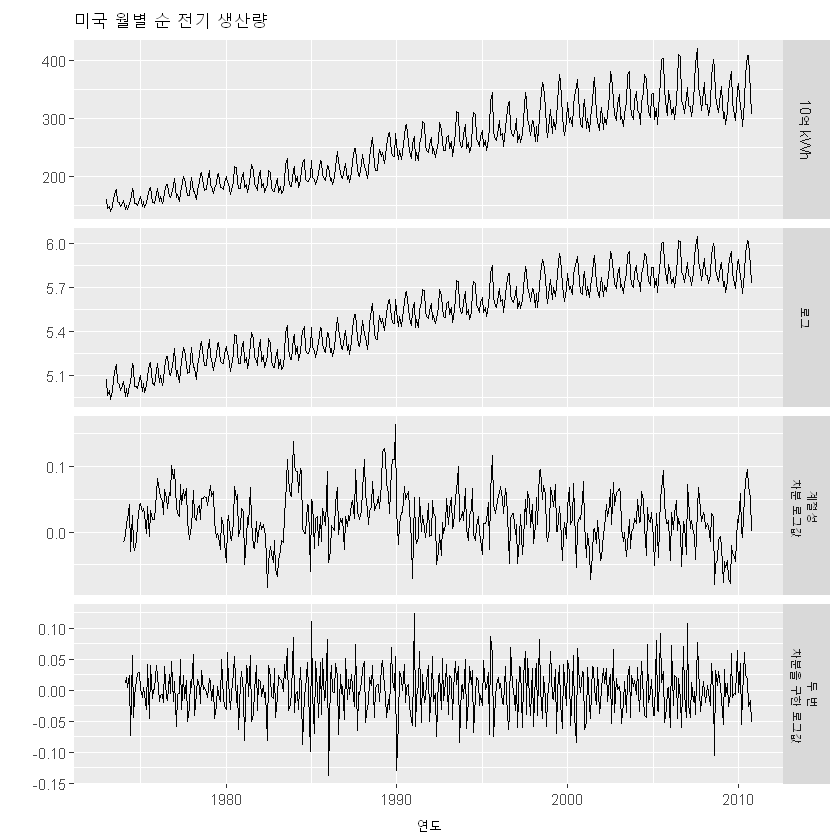

In [5]:
cbind("10억 kWh" = usmelec,
      "로그" = log(usmelec),
      "계절성\n 차분 로그값" =
        diff(log(usmelec),12),
      "두 번\n 차분을 구한 로그값" =
        diff(diff(log(usmelec),12),1)) %>%
  autoplot(facets=TRUE) +
    xlab("연도") + ylab("") +
    ggtitle("미국 월별 순 전기 생산량")

어떤 차분(difference)을 구할지 정할 때는 주관적인 요소가 어느정도 들어갑니다. 차분을 구하는 것에 대한 몇 가지 형식적인 검정을 아래에서 다룰 것이지만, 모델링 과정에서 항상 몇 가지 선택이 존재하고, 분석하는 사람마다 다른 선택을 할 수도 있습니다.

$y^{'}_t = y_t−y_{t−m}$
 가 계절성 차분(seasonal difference)을 구한 시계열을 나타낸다면, 두 번 차이를 구한 시계열은 다음과 같습니다.
 
$$\begin{align*}
y''_t &= y'_t - y'_{t-1} \\
      &= (y_t - y_{t-m}) - (y_{t-1} - y_{t-m-1}) \\
      &= y_t -y_{t-1} - y_{t-m} + y_{t-m-1}\:
\end{align*}$$

**계절성 차분과 1차 차분을 둘 다 적용할 때, 어떤 것을 먼저 적용하더라도 차이는 없습니다** — 결과가 같을 것입니다. 하지만, **데이터에 계절성 패턴이 강하게 나타나면, 계절성 차분을 먼저 계산하는 것을 추천합니다. 왜냐하면, 때때로 결과 시계열에서 정상성이 나타나기도 해서 이런 경우에는 1차 차분을 구할 필요가 없게 되기 때문입니다. 1차 차분을 먼저 계산했다면, 여전히 남아있는 계절성이 나타날 것입니다.**

차분을 구했다면, 차분 값이 해석 가능할 것이라는 것은 중요합니다. 첫 번째 차분값은 한 관측값과 그 다음 관측값 사이의 변화입니다. 계절성 차분값은 한 해와 그 다음 해 사이의 변화입니다. 다른 시차값(lagged value)은 직관적으로 해석하기가 쉽지 않기 때문에 사용하지 않는 것이 좋습니다.

<br>

### 단위근검정

**단위근검정(unit root tests)은 더 객관적으로 차분을 구하는 것이 필요할 지 결정하기 위해 사용하는 한 가지 방법입니다. 차분을 구하는 것이 필요한지 결정하는 상황을 위해 설계된 통계적 가설 검정들이 존재합니다.**

사용할 수 있는 단위근검정은 다양하고, 서로 다른 가정에 기초하고 있으며, 상반되는 답을 낼 수도 있습니다. 분석 과정에서 퀴아트코프스키-필립스-슈미트-신(Kwiatkowski-Phillips-Schmidt-Shin) (KPSS) 검정 (Kwiatkowski, Phillips, Schmidt, & Shin, 1992)을 사용하겠습니다. 

**이 검정은 데이터에 정상성이 나타난다는 것이 귀무가설(null hypothesis)이고, 귀무 가설이 거짓이라는 증거를 찾으려고 합니다.** 결과적으로, 작은 p-값(예를 들면, 0.05보다 작은)은 차이를 구하는 것이 필요하다는 것을 나타냅니다. 검정은 `urca` 패키지의 `ur.kpss()` 함수를 사용하여 수행할 수 있습니다.

예를 들어, 이것을 구글 주식 가격 데이터에 적용해봅시다.

In [12]:
library(urca)
goog %>% ur.kpss() %>% summary()


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 7 lags. 

Value of test-statistic is: 10.7223 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


검정 통계가 1% 임계값보다 훨씬 큽니다. **이것은 귀무가설(null hypothesis)이 기각된다는 것을 의미합니다. 즉, 데이터가 정상성(stationarity)을 가지고 있지 않습니다. 데이터에 차분을 수행할 수 있고 검정을 다시 적용할 수 있습니다.**

In [13]:
goog %>% diff() %>% ur.kpss() %>% summary()


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 7 lags. 

Value of test-statistic is: 0.0324 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


이번에는 검정 통계가 작고, 정상성(stationarity)이 나타나는 데이터에서 볼 수 있는 것처럼 범위 안에 잘 들어갑니다. 따라서 차분을 구한 데이터가 정상성을 나타낸다고 결론 내릴 수 있습니다.

1차 차분의 적당한 횟수를 결정하기 위해 여러번의 KPSS 검정을 사용하는 이 과정을 `ndiffs()`로 수행할 수 있습니다.

In [14]:
ndiffs(goog)

[1] 1

위의 KPSS 검정들에서 본 것처럼, goog 데이터가 정상성을 나타내도록 하려면 한 번의 차분(difference)이 필요합니다.

<br>

**계절성 차분(seasonal difference)이 필요한지 결정하기 위한 비슷한 함수는 `nsdiffs()`입니다. 이 함수는 필요한 계절성 차분의 적당한 횟수를 결정하기 위해 계절성 강도 측정량을 사용합니다.  $F_S
<
0.64$ 이면, 계절성 차분이 필요없다고 알려주고, 이외의 경우에는 하나의 계절성 차분이 필요하다 알려줍니다.**





In [15]:
usmelec %>% log() %>% nsdiffs()

[1] 1

In [16]:
usmelec %>% log() %>% diff(lag=12) %>% ndiffs()

[1] 1

**`nsdiffs()`의 결과가 1이기 때문에(이것은 한 번 계절성 차분이 필요하다는 것을 가리킵니다),** ndiffs() 함수를 계절성 차분을 구한 데이터에 적용합니다. 이러한 함수는 계절성 차분과 1차 차분 둘 다 수행해야한다는 것을 나타냅니다.



<br>

## 08.02. 후방이동 기호


<br>

후방이동(backshift) 연산자  $B$는 시계열 시차를 다룰 때 유용한 표기법 장치입니다:

$$B y_{t} = y_{t - 1} \: .$$

(어떤 참고 문헌에서는 “후방이동(backshift)”을 나타내는 $B$ 대신에 “시차(lag)”을 나타내는 $L$을 사용합니다.) 다르게 말하면, $y_t$에 작용하는 $B$는 데이터를 한 시점 뒤로 옮기는 효과를 냅니다. $B$를 $y_t$에 두 번 적용하면 데이터를 두 시점 뒤로 옮깁니다:

$$B(By_{t}) = B^{2}y_{t} = y_{t-2}\: .$$

월별 데이터에서, “지난해 같은 달”을 다루고 싶다면, 다음과 같이 이렇게 표기합니다. $B^{12}y_{t}$ 후방이동(backshift) 연산자는 차분을 구하는 과정을 설명할 때 편리합니다. 1차 차분을 다음과 같이 쓸 수 있습니다.

$$y'_{t} = y_{t} - y_{t-1} = y_t - By_{t} = (1 - B)y_{t}\: .$$

1차 차분을  $(1-B)$로 나타냈다는 것에 주목하시길 바랍니다. 비슷하게, 2차 차분을 계산해야하면, 이 때는 아래와 같이 주어집니다.

$$y''_{t} = y_{t} - 2y_{t - 1} + y_{t - 2} = (1-2B+B^2)y_t = (1 - B)^{2} y_{t}\: .$$

일반적으로, $d$차 차분은 다음과 같이 쓸 수 있습니다.

$$(1 - B)^{d} y_{t}.$$

차분을 연산자로 결합하면 보통의 대수 법칙을 사용하여 다룰 수 있게 되기 때문에, 후방이동(backshift) 기호는 특별히 유용합니다. 특별히, $B$를 포함하는 항은 서로 곱할 수 있습니다.

예를 들면, 1차 차분 뒤에 이어서 나오는 계절성 차분은 다음과 같이 쓸 수 있습니다.

$$\begin{align*}
(1-B)(1-B^m)y_t &= (1 - B - B^m + B^{m+1})y_t \\
&= y_t-y_{t-1}-y_{t-m}+y_{t-m-1},
\end{align*}$$

이는 이전에 얻은 결과와 같은 것입니다.



<br>

## 08.03. 자기회귀 모델

다중 회귀 모델에서, 목표 예상 변수(forecast variable)의 선형 조합을 이용하여 관심 있는 변수를 예측했습니다. **자기회귀 모델에서는, 변수의 과거 값의 선형 조합을 이용하여 관심 있는 변수를 예측합니다. 자기회귀(autoregressive)라는 단어에는 자기 자신에 대한 변수의 회귀라는 의미가 있습니다.**

따라서, 차수 $p$의 자기회귀 모델(autoregressive models)은 다음과 같이 쓸 수 있습니다.

$$y_{t} = c + \phi_{1}y_{t-1} + \phi_{2}y_{t-2} + \dots + \phi_{p}y_{t-p} + \varepsilon_{t},$$

**여기에서 $\epsilon_t$는 백색잡음(white noise)입니다. $y_t$의 시차 값을 예측변수(predictor)로 다루는 것만 제외하면 다중 회귀처럼 생겼습니다. 이것을 $p$ 자기회귀 모델인 $AR(p)$모델이라고 부르겠습니다.**

자기회귀 모델(autoregressive model)은 다양한 종류의 서로 다른 시계열 패턴을 매우 유연하게 다룰 수 있습니다. 그림 8.5에 있는 두 시계열은 AR(1) 모델과 AR(2) 모델로 얻은 시계열입니다. 매개변수 $\phi_1,\dots,\phi_p$을 바꾸면 다른 시계열 패턴이 나옵니다. 오차항 $\epsilon_t$의 분산은 시계열의 패턴이 아니라 눈금만 바꿀 것입니다.


<br>

매개변수를 다르게 설정한 자기회귀 모델로부터 얻은 데이터의 두 가지 예. 

왼쪽: $y_t = 18 -0.8y_{t-1} + \varepsilon_t$인 AR(1)

오른쪽: $y_t = 8 + 1.3y_{t-1}-0.7y_{t-2}+\varepsilon_t$인 AR(2). 두 가지 경우 모두, $ε_t$은 평균이 0이고 분산이 1인 정규 분포를 따르는 백색잡음입니다.

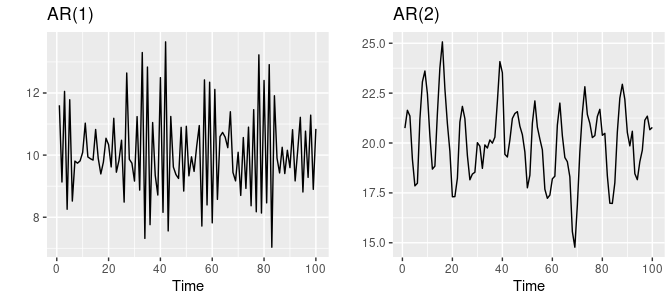

<br>

AR(1) 모델은:

* **$\phi_1=0$일 때,  $y_t$는 백색잡음과 같습니다;**
* **$\phi_1=1$ 이고 $c=0$일 때, $y_t$는 확률보행 모델과 같습니다;**
* **$\phi_1=1$이고  $c≠0$일 때,  $y_t$는 표류가 있는 확률보행 모델과 같습니다;**
* **$\phi_1<0$ 일 때,  $y_t$는 평균값을 중심으로 진동하는 경향을 나타냅니다.**

**보통은 자기회귀 모델을 정상성을 나타내는 데이터에만 사용합니다. 이 경우에는 매개변수 값에 대한 몇몇 제한조건이 필요합니다.**

* AR(1) 모델의 경우: $-1 < \phi_1 < 1$
* AR(2) 모델의 경우: $\phi_2-\phi_1 < 1$

$p≥3$일 때는, 제한조건이 훨씬 더 복잡합니다. 모델을 다룰 때 R에서 이러한 제한조건을 처리해줍니다. 

<br>

## 08.04. 이동 평균 모델

**회귀에서 목표 예상 변수(forecast variable)의 과거 값을 이용하는 대신에, 이동 평균 모델은 회귀처럼 보이는 모델에서 과거 예측 오차(forecast error)을 이용합니다.**

$$y_{t} = c + \varepsilon_t + \theta_{1}\varepsilon_{t-1} + \theta_{2}\varepsilon_{t-2} + \dots + \theta_{q}\varepsilon_{t-q},$$

여기에서 $ε_t$는 백색잡음입니다. 이것을  $q$차 이동 평균 모델인 $MA(q)$모델이라고 부르겠습니다. 물론, $ε_t$의 값을 관찰하지 않기 때문에, 이것은 실제로는 보통 생각하는 회귀가 아닙니다.

**$y_t$의 각 값을 과거 몇 개의 예측 오차(forecast error)의 가중 이동 평균으로 생각할 수 있다는 것에 주목합시다. 하지만, 이동 평균 모델을 6장에서 다룬 이동 평균 평활과 헷갈리지 말아야 합니다. 이동 평균 모델은 미래 값을 예측할 때 사용합니다만, 이동 평균 평활은 과거 값의 추세-주기를 측정할 때 사용합니다.**

* 매개변수를 다르게 설정한 이동 평균 모델로부터 얻은 데이터의 두 가지 예. 

왼쪽: $y_t=20+ε_t+0.8ε_{t−1}$인 MA(1). 

오른쪽: $y_t=ε_t−ε_{t−1}+0.8ε_{t−2}$인 MA(2). 두 가지 경우 모두, $ε_t$은 평균이 0이고 분산이 1인 정규 분포를 따르는 백색잡음입니다.

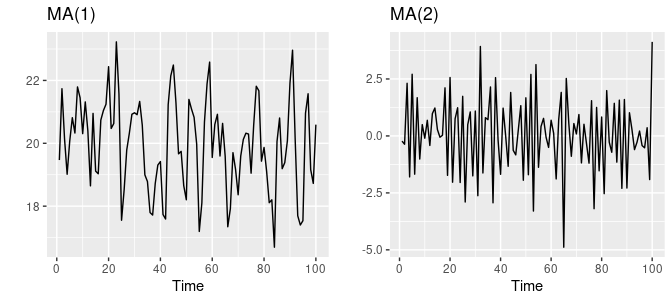

MA(1) 모델과 MA(2) 모델로 얻은 몇몇 데이터를 나타냅니다. 매개변수 $\theta_1,\dots,\theta_q$을 바꾸면 다른 시계열 패턴이 나타납니다. 자기회귀 모델을 이용하는 경우처럼, 오차항 $ε_t$의 분산은 시계열의 패턴이 아니라 눈금만 바꿀 것입니다.

<br>

**정상성을 나타내는 어떤 $AR(p)$ 모델을 $MA(∞)$ 모델로 쓸 수 있습니다. 예를 들어, 반복하여 대입하면, 이렇게 바꿔 쓰는 과정을 AR(1) 모델에 대해 다음과 같이 나타낼 수 있습니다:**

$$\begin{align*}
y_t &= \phi_1y_{t-1} + \varepsilon_t\\
&= \phi_1(\phi_1y_{t-2} + \varepsilon_{t-1}) + \varepsilon_t\\
&= \phi_1^2y_{t-2} + \phi_1 \varepsilon_{t-1} + \varepsilon_t\\
&= \phi_1^3y_{t-3} + \phi_1^2 \varepsilon_{t-2} + \phi_1 \varepsilon_{t-1} + \varepsilon_t\\
&\text{etc.}
\end{align*}$$

**$-1 < \phi_1 < 1$에 대해, $k$가 커질 수록 $\phi_1^k$의 값이 작아질 것입니다. 그래서 결국 다음과 같은 식을 얻습니다.**

$$y_t = \varepsilon_t + \phi_1 \varepsilon_{t-1} + \phi_1^2 \varepsilon_{t-2} + \phi_1^3 \varepsilon_{t-3} + \cdots,$$

**$MA(∞)$ 과정입니다.**

**MA 매개변수에 대한 몇몇 제한조건을 도입하면 반대 결과도 성립합니다. 그러면 MA 모델을 가역적(invertible)이라고 부릅니다. 즉, 어떤 가역적인 $MA(q)$과정을 $AR(∞)$과정으로 쓸 수 있습니다.** 가역적 모델은 단순하게 MA 모델을 AR 모델로 바꿀 수 있도록 하는 것만은 아닙니다. 몇 가지 수학적인 특징도 갖고 있습니다.

**예를 들어, MA(1) 과정 $y_{t} = e_t + \theta_{1}e_{t-1}$을 생각해봅시다. 이것을 $AR(∞)$로 표현하면, 가장 최근의 오차는 현재와 과거 관측값의 선형 함수로 쓸 수 있습니다:**

$$e_t = \sum_{j=0}^\infty (-\theta)^j y_{t-j}.$$

**$|\theta| > 1$이면, 가중치의 시차(lag) 값이 증가함에 따라 증가하고, 따라서 더 멀리 떨어진 관측값일 수록 현재 오차에 미치는 영향이 커집니다.**

**$|\theta|=1$이면, 가중치가 크기에 대해 상수이고, 멀리 떨어진 관측값과 가까운 관측값 모두 같은 영향을 미칩니다. 앞의 두 경우 모두 그럴듯하지 않기 때문에, $|\theta|<1$가 필요하고, 따라서 가장 최근 관측값이 멀리 떨어진 관측값보다 더 큰 가중치를 갖게 됩니다.**

**따라서, $|\theta|<1$일 때, 과정은 가역적(invertible)입니다.**

**다른 모델에 대한 가역성(invertibility) 제한조건은 정상성(stationarity) 제한조건과 비슷합니다.**

* MA(1) 모델의 경우: $-1<\theta_1<1$
* MA(2) 모델의 경우: $-1<\theta_2<1,~$, $\theta_2+\theta_1 >-1,~$, $\theta_1 -\theta_2 < 1$

$q≥3$에 대해서는 더 복잡한 조건이 성립합니다. 여기에서도, R에서 모델을 다룰 때 이러한 제한조건을 처리해줄 것입니다.

<br>

## 08.05. 비-계절성 ARIMA 모델

차분을 구하는 것을 자기회귀와 이동 평균 모델과 결합하면, 비-계절성(non-seasonal) ARIMA 모델을 얻습니다. **ARIMA는 AutoRegressive Integrated Moving Average (이동 평균을 누적한 자기회귀)의 약자입니다(이러한 맥락에서, “누적(integration)”은 차분의 반대 의미를 갖습니다). 모델을 다음과 같이 나타낼 수 있습니다.**

$$\begin{equation}
  y'_{t} = c + \phi_{1}y'_{t-1} + \cdots + \phi_{p}y'_{t-p}
     + \theta_{1}\varepsilon_{t-1} + \cdots + \theta_{q}\varepsilon_{t-q} + \varepsilon_{t},  \
\end{equation}$$

**여기에서 $y'_{t}$는 차분을 구한 시계열입니다(한 번 이상 차분을 구한 것일 수도 있습니다). 우변의 “예측변수(predictor)”에는 $y_t$의 시차 값과 시차 오차(lagged error) 둘 다를 포함합니다. 이것을 $ARIMA(p,d,q)$ 모델이라고 부르겠습니다. 여기에서 각 변수 $p,d,q$는 다음과 같은 의미를 갖습니다.**

<table>
<thead>
<tr>
<th style="text-align:right;">
</th>
<th style="text-align:left;">
</th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:right;">
<span class="math inline">\(p=\)</span>
</td>
<td style="text-align:left;">
자기회귀 부분의 차수;
</td>
</tr>
<tr>
<td style="text-align:right;">
<span class="math inline">\(d=\)</span>
</td>
<td style="text-align:left;">
1차 차분이 포함된 정도;
</td>
</tr>
<tr>
<td style="text-align:right;">
<span class="math inline">\(q=\)</span>
</td>
<td style="text-align:left;">
이동 평균 부분의 차수.
</td>
</tr>
</tbody>
</table>

자기회귀(autoregression)와 이동 평균 모델에 사용되는 것과 같은 정상성(stationarity)과 가역성(invertiblity) 조건은 ARIMA 모델에도 적용됩니다.

지금까지 다룬 많은 모델은 ARIMA 모델의 특수한 경우입니다.

<table>
<caption>
<span id="tab:arimaspecialcases"> </span>ARIMA 모델의 특별한 경우.
</caption>
<tbody>
<tr>
<td style="text-align:left;">
백색잡음
</td>
<td style="text-align:left;">
ARIMA(0,0,0)
</td>
</tr>
<tr>
<td style="text-align:left;">
확률보행
</td>
<td style="text-align:left;">
상수가 없는 ARIMA(0,1,0)
</td>
</tr>
<tr>
<td style="text-align:left;">
표류를 포함하는 확률보행
</td>
<td style="text-align:left;">
상수가 있는 ARIMA(0,1,0)
</td>
</tr>
<tr>
<td style="text-align:left;">
자기회귀
</td>
<td style="text-align:left;">
ARIMA(<span class="math inline">\(p\)</span>,0,0)
</td>
</tr>
<tr>
<td style="text-align:left;">
이동평균
</td>
<td style="text-align:left;">
ARIMA(0,0,<span class="math inline">\(q\)</span>)
</td>
</tr>
</tbody>
</table>

이러한 방식으로 더욱 복잡한 모델을 만들기 위해 성분을 결합할 때, 후방이동(backshift) 기호를 쓰면 훨씬 쉬워집니다.

$$\begin{equation}
\
  \begin{array}{c c c c}
    (1-\phi_1B - \cdots - \phi_p B^p) & (1-B)^d y_{t} &= &c + (1 + \theta_1 B + \cdots + \theta_q B^q)\varepsilon_t\\
    {\uparrow} & {\uparrow} & &{\uparrow}\\
    \text{AR($p$)} & \text{$d$ differences} & & \text{MA($q$)}\\
  \end{array}
\end{equation}$$

R에서는 약간 다른 매개변수화 과정을 사용합니다:

$$\begin{equation}
\
  (1-\phi_1B - \cdots - \phi_p B^p)(y_t' - \mu) = (1 + \theta_1 B + \cdots + \theta_q B^q)\varepsilon_t,
\end{equation}$$

**여기에서 $y_t' = (1-B)^d y_t$이고 $\mu$는 $y^{'}_t$ 평균입니다. [$c = \mu(1-\phi_1 - \cdots - \phi_p )$]**



<br>

### 미국의 소비 지출

미국 소비 지출 분기별 백분율 변화를 나타냅니다. 분기별 시계열이지만, 계절성 패턴이 나타나지 않는 것 같습니다. 따라서 비-계절성 ARIMA 모델로 맞추겠습니다.

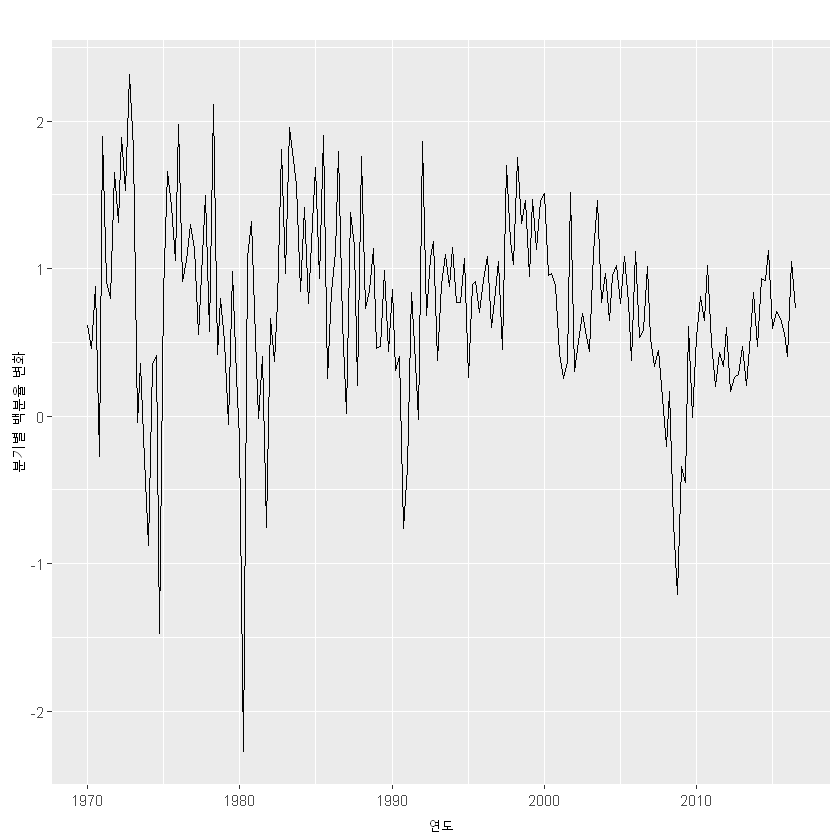

In [3]:
autoplot(uschange[,"Consumption"]) +
  xlab("연도") + ylab("분기별 백분율 변화")

다음의 R 코드는 모델을 자동으로 선택할 때 사용합니다.

In [5]:
fit <- auto.arima(uschange[,"Consumption"], seasonal=FALSE)

fit

Series: uschange[, "Consumption"] 
ARIMA(1,0,3) with non-zero mean 

Coefficients:
         ar1      ma1     ma2     ma3    mean
      0.5885  -0.3528  0.0846  0.1739  0.7454
s.e.  0.1541   0.1658  0.0818  0.0843  0.0930

sigma^2 = 0.3499:  log likelihood = -164.81
AIC=341.61   AICc=342.08   BIC=361

아래는 ARIMA(1,0,3) 모델입니다:

$$y_t = c + 0.589y_{t-1}
          -0.353 \varepsilon_{t-1}
          + 0.0846 \varepsilon_{t-2}
          + 0.174 \varepsilon_{t-3}
          + \varepsilon_{t},$$
          
여기에서 $c= 0.745 \times (1 - 0.589) = 0.307$이고 $ε_t$는 다음과 같이 $0.592 = \sqrt{0.350}$ 이러한 표준 편차를 갖는 백색잡음(white noise)입니다.



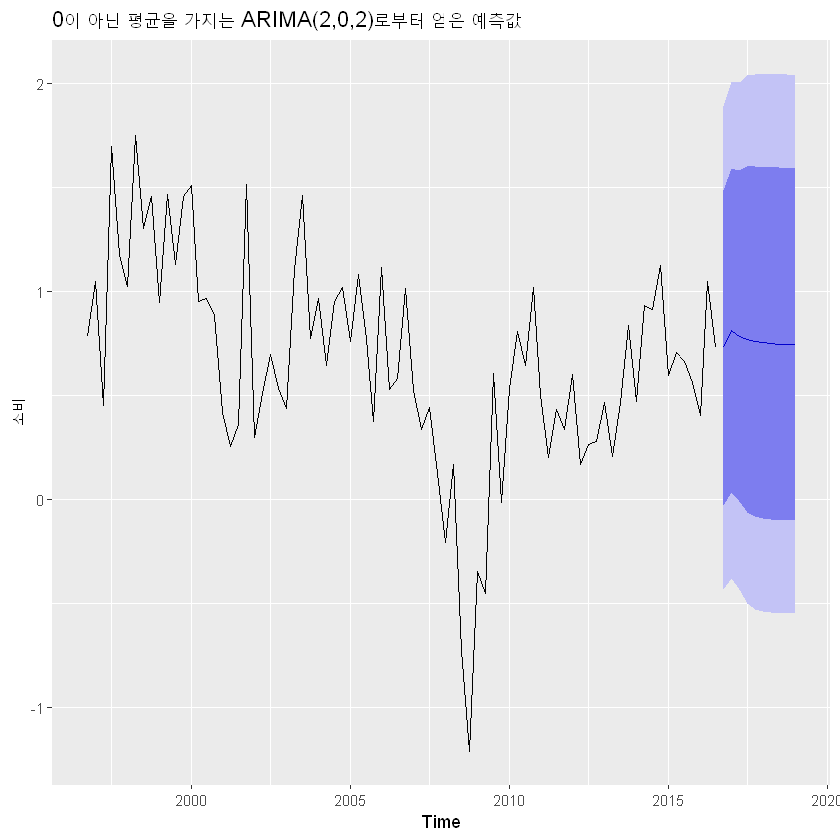

In [6]:
fit %>% forecast(h=10) %>% autoplot(include=80) +
  ggtitle("0이 아닌 평균을 가지는 ARIMA(2,0,2)로부터 얻은 예측값") + ylab("소비")

<br>

### ARIMA 모델 이해하기

`auto.arima()` 함수는 유용합니다만, 모든 입력을 자동으로 결정하게 두면 약간 위험할 수 있습니다. 그리고 자동으로 모델을 고르게 두더라도 모델이 대략적으로 작동하는 방식은 공부해볼만 합니다.

상수  $c$ 는 이러한 모델에서 얻은 장기 예측값에 중요한 영향을 줍니다.

* **$c=0$ 이고  $d=0$이면, 장기 예측값이 0에 가까워질 것입니다.**
* **$c=0$ 이고  $d=1$이면, 장기 예측값이 0이 아닌 상수에 가까워질 것입니다.**
* **$c=0$ 이고  $d=2$이면, 장기 예측값이 직선 형태로 나타나게 될 것입니다.**
* **$c\ne0$ 이고  $d=0$이면, 장기 예측값이 데이터의 평균에 가까워질 것입니다.**
* **$c\ne0$ 이고  $d=1$이면, 장기 예측값이 직선 형태로 나타나게 될 것입니다.**
* **$c\ne0$ 이고  $d=2$이면, 이면, 장기 예측값이 2차 곡선 추세로 나타나게 될 것입니다.**

**$d$ 값은 예측 구간(prediction interval)에도 영향을 줍니다 — $d$값이 클 수록, 예측 구간의 크기가 더욱 급격하게 늘어닙니다. $d=0$에서, 장기 예측 표준 편차가 과거 데이터의 표준 편차에 가까워질 것이고, 따라서 모든 예측 구간은 실제적으로는 같게 될 것입니다.**

**그림에서  $d=0$이고  $c≠0$입니다. 이 그림에서, 예측 구간은 마지막 몇 개의 예측 수평선(forecast horizon)에 대한 경우와 거의 같고, 점 예측값(point forecast)은 데이터의 평균과 같습니다.**

**$p$값은 데이터에서 주기(cycles)가 나타날 때 중요합니다. 주기적 예측값을 얻기 위해서는, 매개변수에 대한 몇 가지 추가적인 조건과 함께 $p≥2$이어야 합니다. AR(2) 모델의 경우에, $\phi_1^2+4\phi_2<0$이면 주기적인 행동이 나타냅니다. 이 경우에, 주기(cycle)의 평균 기간은 다음과 같습니다**

$$\frac{2\pi}{\text{arc cos}(-\phi_1(1-\phi_2)/(4\phi_2))}.$$

<br>

### ACF와 PACF 그래프

**보통은 단순하게 시간 그래프(time plot)만 보고나서 어떤  $p$와 $q$값이 데이터에 맞는지 이야기할 수 없습니다. 하지만, 적절한  $p$와 $q$ 값을 결정하기 위해서 때때로 ACF 그래프와 PACF 그래프를 이용하면 가능합니다.**

**서로 다른 $k$값에 대해,  $y_t$와  $y_{t−k}$의 관계를 측정하는 자기상관값(autocorrelation)을 나타내는 ACF 그래프를 다시 떠올려봅시다. $y_t$와 $y_{t−1}$ 이 상관 관계가 있다면,  $y_{t−1}$과  $y_{t−2}$에도 상관관계가 있어야 합니다. 하지만, $y_t$와  $y_{t−2}$는 ($y_t$를 예측하는데 사용될 수도 있는) $y_{t−2}$에 담긴 어떤 새로운 정보 때문이 아니라 단순히 두 값 모두 $y_{t−1}$과 관련이 있기 때문에 상관관계를 가질 수도 있습니다.**

**이러한 문제를 극복하기 위해, 부분 자기상관값들(partial autocorrelations)을 이용할 수 있습니다. 이 값은 시차  $1, 2, 3, \dots, k - 1$의 효과를 제거한 후의  $y_t$와 $y_{t−k}$사이의 관계를 측정합니다. 그래서 첫 번째 부분 자기상관은 제거할 부분이 없어서 첫 번째 자기상관과 같습니다. 각 부분 자기상관은 자기회귀 모델의 마지막 계수처럼 측정할 수 있습니다. 구체적으로, $k$번째 부분 자기상관 계수 $α_k$은 $AR(k)$ 모델에서 $ϕ_k$측정값과 같습니다. 실제 상황에서는, 이러한 자기회귀값 전부를 맞추는 것과 같은 결과를 내면서 더 효율적으로 $α_k$를 계산하는 알고리즘들이 존재합니다.**

미국 소비 데이터의 ACF와 PACF 그래프를 나타냅니다. 부분 자기상관값은 보통의 자기상관값처럼 $\pm 1.96/\sqrt{T}$로 같은 임계 값을 갖고, 보통은 그림에서 나타낸 것처럼 그래프로 나타냅니다.

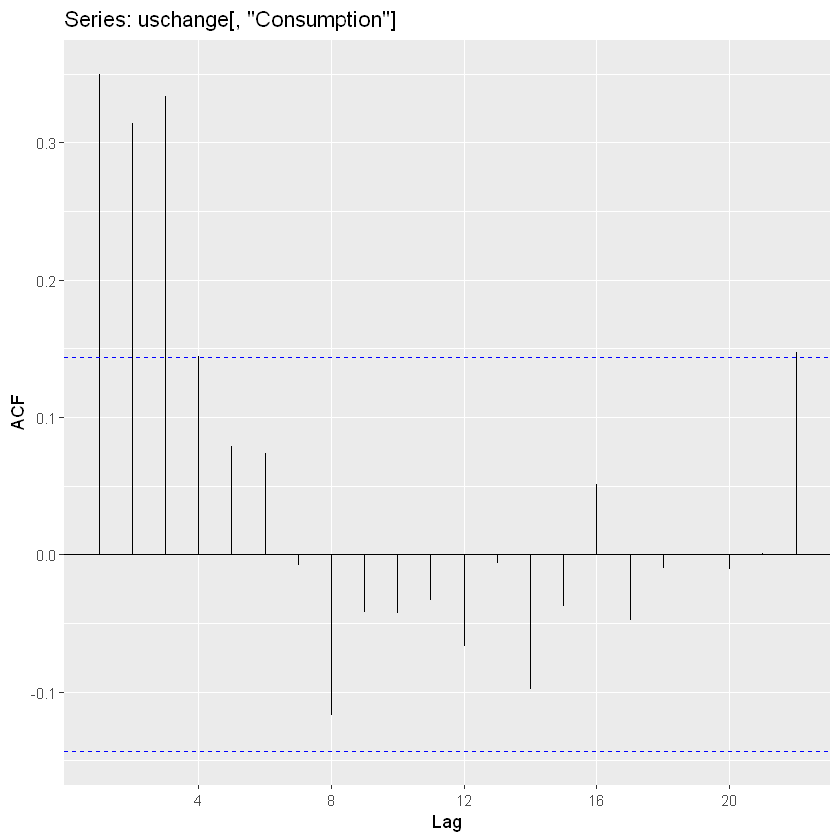

In [7]:
ggAcf(uschange[,"Consumption"])

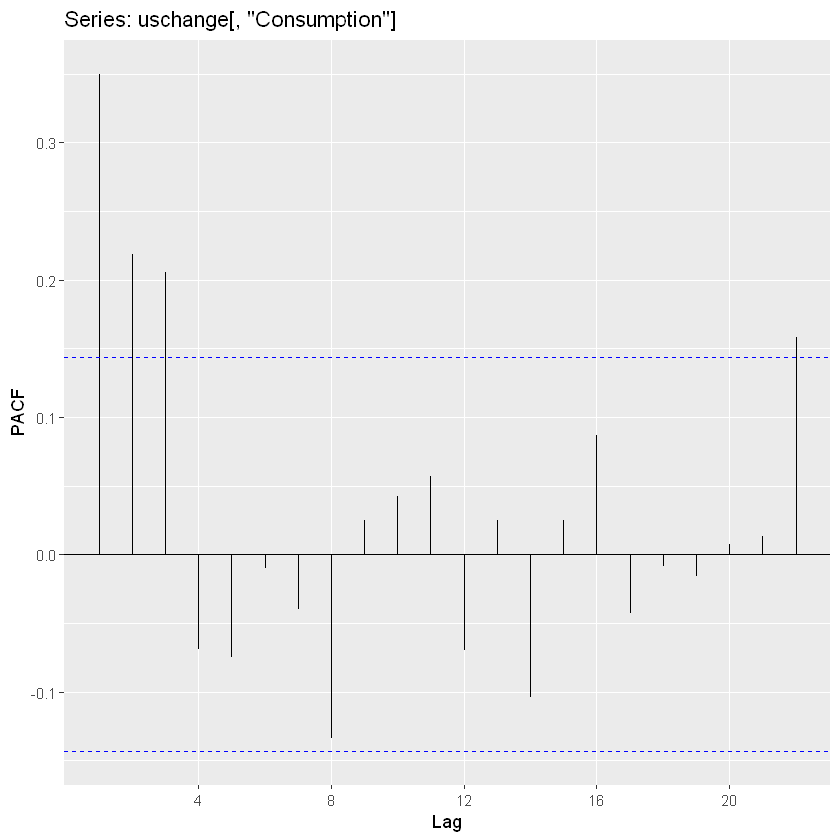

In [8]:
ggPacf(uschange[,"Consumption"])

데이터가 $ARIMA(p,d ,0)$나 $ARIMA(0,d,q)$ 모델에서 왔다면, $p$나  $q$값을 결정할 때 ACF와 PACF 그래프가 유용할 수 있습니다. $p$와  $q$가 모두 양수라면, 적절한 $p$와 $q$값을 찾을 때 이러한 그래프는 도움이 되지 않습니다.

**차분을 구한 데이터의 ACF와 PACF 그래프가 다음과 같은 패턴을 나타내면, 데이터는 $ARIMA(p,d ,0)$ 모델을 따를 수도 있습니다:**

* **ACF가 지수적으로 감소하거나 사인 함수 모양인 경우;**
* **PACF 그래프에서 시차  $p$에 뾰족한 막대가 유의미하게 있지만, 시차  $p$이후에는 없을 때.**

**차분을 구한 데이터의 ACF와 PACF 그래프가 다음과 같은 패턴을 나타내면, 데이터는 $ARIMA(0,   
d
 , 
q
 ) $모델을 따를 수도 있습니다:**
 
* **PACF가 지수적으로 감소하거나 사인 함수 모양인 경우;**
* **ACF 그래프에서 시차  $q$ 에 뾰족한 막대가 유의미하게 있지만, 시차 $q$  이후에는 없을 때.**

그림 ACF에서 시차 4에서 나타나는 거의 유의미한 뾰족한 막대 이전에 3개의 뾰족한 막대가 있는 것을 알 수 있습니다. PACF에서 3개의 유의미한 뾰족한 막대가 있고, 그 이후에는 (22 뒤처짐에서 경계를 한 번 벗어나는 것을 제외하고는) 유의미하게 나타나는 뾰족한 막대가 없습니다. **각 그래프에서 처음 몇 뒤처짐이 아니라 한 번 유의미하게 경계를 벗어나는 것을 무시할 수 있습니다.** 결국에, 뾰족한 막대가 유의미하게 될 확률은 1/20이고, 각 그래프에서 시차 22에서 나타나는 뾰족한 막대를 나타냈습니다. 첫 3개의 뾰족한 막대에서 나타나는 패턴은 PACF가 감소하는 경향을 통해 $ARIMA(3,0,0)$에서 예측했던 것입니다. 그래서 ACF와 PACF을 보면 이 경우에는 $ARIMA(3,0,0)$ 모델이 적절할 수도 있다고 생각할 수 있습니다.

In [9]:
(fit2 <- Arima(uschange[,"Consumption"], order=c(3,0,0)))

Series: uschange[, "Consumption"] 
ARIMA(3,0,0) with non-zero mean 

Coefficients:
         ar1     ar2     ar3    mean
      0.2274  0.1604  0.2027  0.7449
s.e.  0.0713  0.0723  0.0712  0.1029

sigma^2 = 0.3494:  log likelihood = -165.17
AIC=340.34   AICc=340.67   BIC=356.5

사실 이 모델은 (342.08와 비교하는 AICc 값 340.67을 가지는) `auto.arima()`로 찾은 모델보다 살짝 낫습니다. `auto.arima()` 함수는 찾을 때 모든 가능한 모델을 고려하지 않기 때문에 이 모델을 못 찾습니다. `stepwise=FALSE`와 `approximation=FALSE` 입력값으로 더 잘 찾을 수 있습니다:

In [10]:
(fit3 <- auto.arima(uschange[,"Consumption"], seasonal=FALSE,
  stepwise=FALSE, approximation=FALSE))

Series: uschange[, "Consumption"] 
ARIMA(3,0,0) with non-zero mean 

Coefficients:
         ar1     ar2     ar3    mean
      0.2274  0.1604  0.2027  0.7449
s.e.  0.0713  0.0723  0.0712  0.1029

sigma^2 = 0.3494:  log likelihood = -165.17
AIC=340.34   AICc=340.67   BIC=356.5

**계절성 ARIMA 모델을 검색하지 않도록 하기 위해 입력값 `seasonal=FALSE`도 사용합니다**

에는 `auto.arima()`가 ACF와 PACF 그래프에서 추측할 수 있는 것과 같은 모델을 찾았습니다.

<br>

## 08.06. 추정과 차수 선택

<br>

### 최대 가능도 추정

모델의 차수를 찾은 다음(즉,  $p ,  
d
 ,  
q$
  값), 다음과 같은 매개변수 $c, \phi_1,\dots,\phi_p, \theta_1,\dots,\theta_q$을 추정할 필요가 있습니다. R에서 ARIMA 모델을 계산할 때는, **최대 가능도 추정(maximum likelihood estimation) (MLE)을 사용합니다.** 
  
**이 방법은 관찰한 데이터를 얻는 확률을 최대화하는 매개변수의 값을 찾습니다. ARIMA 모델에서는 MLE는 다음과 같은 양을 최소화하는 최소제곱(least squares) 추정과 비슷합니다.**

$$\sum_{t=1}^T\varepsilon_t^2.$$

MLE는 최소제곱추정(least squares estimation)과 정확하게 같은 매개변수 추정값을 냅니다.) ARIMA 모델이 회귀 모델을 추정하는 것보다 훨씬 더 복잡하고, 서로 다른 소프트웨어가 서로 다른 추정 기법과 최적화 알고리즘을 사용하기 때문에 살짝 다른 결과를 낼 수 있다는 것에 주목하시길 바랍니다.

실제로는, R은 데이터의 로그 가능도(log likelihood) 값을 알려줄 것입니다. 즉, 추정한 모델에서 나온 관측 데이터의 확률의 로그를 말합니다. 주어진  $
p
 ,  
d
 ,  
q$
  값에 대해, 매개변수값을 찾을 때, 로그 가능도를 최대화할 것입니다.

<br>

### 정보 기준

회귀에서 예측변수(predictor)를 고를 때 유용했던 아카이케(Akaike)의 정보 기준(AIC; Akaike’s information Criterion)이 ARIMA 모델에서 차수를 결정할 때도 유용합니다. AIC는 다음과 같이 쓸 수 있습니다.

$$\text{AIC} = -2 \log(L) + 2(p+q+k+1),$$

여기에서  $
L$
 은 데이터의 가능도,  $
c
≠
0$
 이면  $
k
=
1$
 이고,  $
c
=
0$
 이면  $
k
=
0$
 입니다. 괄호 안의 마지막 항이 $(σ^2)$ 와 잔차(residual)의 분산을 포함하는) 모델의 매개변수 개수라는 것에 주목하시길 바랍니다.

ARIMA 모델에 대해, 수정된 AIC는(AICc) 다음과 같이 쓸 수 있습니다.

$$\text{AICc} = \text{AIC} + \frac{2(p+q+k+1)(p+q+k+2)}{T-p-q-k-2},$$

그리고 베이지안(Bayesian) 정보 기준은 다음과 같이 쓸 수 있습니다.

$$\text{BIC} = \text{AIC} + [\log(T)-2](p+q+k+1).$$

AIC, AICc, 또는 BIC를 최소하하여 좋은 모델을 얻습니다. 여기에서는 AICc를 사용하겠습니다.

이러한 정보 기준이 모델의 적절한 차분 차수$(d)$를 고를 때 별로 도움이 되지 않는 경향이 있고,  $p$ 와  $q$
  값을 고를 때만 도움이 된다는 것은 중요한 점입니다. 차분을 구하는 것을 통해 가능도(우도; likelihood)를 계산하는 데이터가 바뀌기 때문에, 서로 다른 차수로 차분을 구한 모델의 AIC 값을 비교할 수 없게 됩니다. 그래서  $d$ 를 고르기 위해 다른 방법을 사용해야 하고, 그리고 나서  $p$ 와  $q$ 를 고르기 위해 AICc를 사용할 수 있습니다.